In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import os

# Define the correct path to the dataset folder in Google Drive
dataset_dir = '/content/drive/MyDrive/Brain_Tumor/'

# Verify if the dataset directory exists
if not os.path.exists(dataset_dir):
    raise FileNotFoundError(f"Dataset directory '{dataset_dir}' not found!")
else:
    print(f"Dataset directory '{dataset_dir}' found.")

# List all image files in the dataset folder
image_files = os.listdir(dataset_dir)

# Check if any image files are found
if len(image_files) == 0:
    raise FileNotFoundError("No image files found in the dataset directory.")
else:
    print(f"Found {len(image_files)} image files in the dataset directory.")

# Load and display each image in the dataset folder
for img_file in image_files:
    img_path = os.path.join(dataset_dir, img_file)
    img = cv2.imread(img_path)

    # Check if the image is successfully loaded
    if img is not None:
        # Display image using cv2_imshow
        cv2_imshow(img)
    else:
        print(f"Error loading image '{img_file}'")


Dataset directory '/content/drive/MyDrive/Brain_Tumor/' found.
Found 2 image files in the dataset directory.
Error loading image 'Testing'
Error loading image 'Training'


Displaying one image from folder 'Training/glioma_tumor':


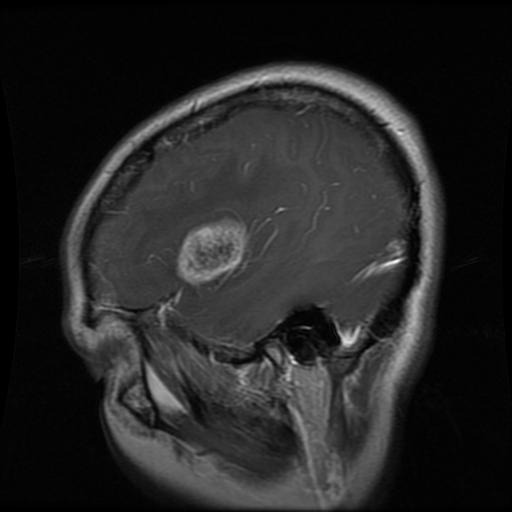

Displaying one image from folder 'Training/meningioma_tumor':


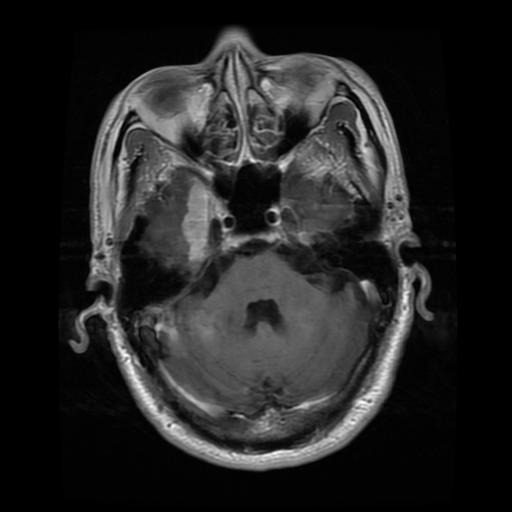

Displaying one image from folder 'Training/no_tumor':


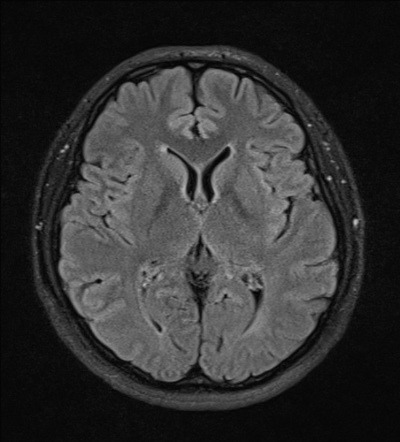

Displaying one image from folder 'Training/pituitary_tumor':


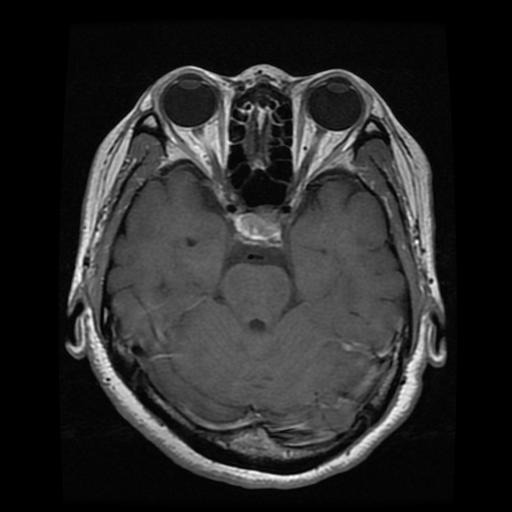

Displaying one image from folder 'Testing/glioma_tumor':


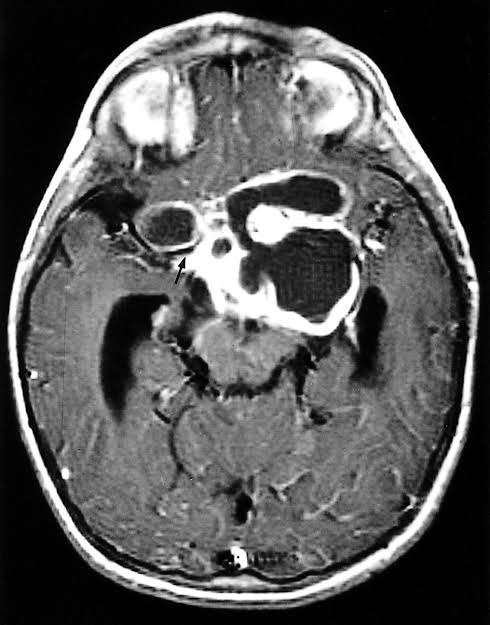

Displaying one image from folder 'Testing/meningioma_tumor':


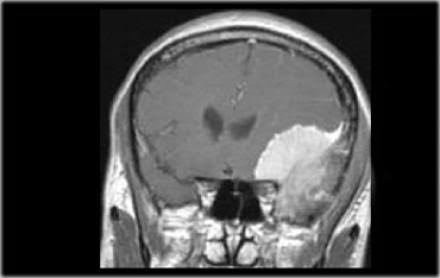

Displaying one image from folder 'Testing/no_tumor':


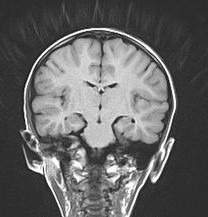

Displaying one image from folder 'Testing/pituitary_tumor':


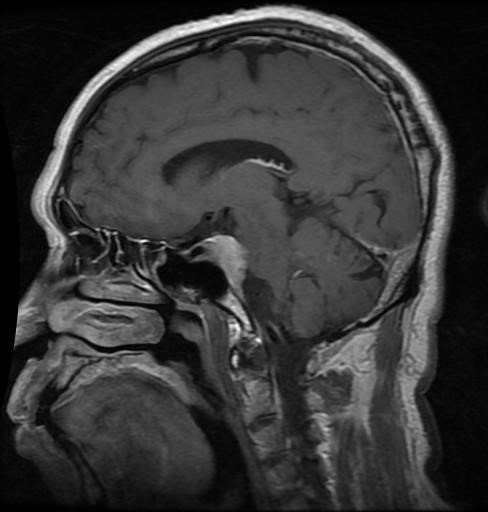

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import os

# Define the correct path to the dataset folder in Google Drive
dataset_dir = '/content/drive/MyDrive/Brain_Tumor/'

# Define the subfolders for training and testing sets with capital T's
train_folders = ['Training/glioma_tumor', 'Training/meningioma_tumor', 'Training/no_tumor', 'Training/pituitary_tumor']
test_folders = ['Testing/glioma_tumor', 'Testing/meningioma_tumor', 'Testing/no_tumor', 'Testing/pituitary_tumor']

# Function to display one image from a folder
def display_one_image(folder):
    folder_path = os.path.join(dataset_dir, folder)
    if not os.path.exists(folder_path):
        print(f"Folder '{folder}' not found.")
        return

    print(f"Displaying one image from folder '{folder}':")
    image_files = os.listdir(folder_path)
    if len(image_files) > 0:
        img_file = image_files[0]  # Get the first image file
        img_path = os.path.join(folder_path, img_file)
        img = cv2.imread(img_path)
        if img is not None:
            cv2_imshow(img)
        else:
            print(f"Error loading image '{img_file}'")
    else:
        print(f"No image files found in folder '{folder}'")

# Display one image from each training folder
for folder in train_folders:
    display_one_image(folder)

# Display one image from each testing folder
for folder in test_folders:
    display_one_image(folder)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to the dataset folders
train_dir = '/content/drive/MyDrive/Brain_Tumor/Training/'
test_dir = '/content/drive/MyDrive/Brain_Tumor/Testing/'

# Define image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

# Create an ImageDataGenerator for data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Create data generators for training and testing sets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Don't shuffle for evaluation
)

# Define the CNN model (a simplified version of LeNet)
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')  # 4 classes for brain tumor types
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model for 10 epochs
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

# Evaluate the trained model on the testing set
loss, accuracy = model.evaluate(test_generator, verbose=1)
print(f'Test accuracy: {accuracy * 100:.2f}%')


Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Epoch 1/10
89/89 [==============================] - 376s 4s/step - loss: 1.2775 - accuracy: 0.3837 - val_loss: 1.7920 - val_accuracy: 0.2448
Epoch 2/10
89/89 [==============================] - 32s 357ms/step - loss: 1.0649 - accuracy: 0.5345 - val_loss: 1.9619 - val_accuracy: 0.3151
Epoch 3/10
89/89 [==============================] - 31s 349ms/step - loss: 0.9379 - accuracy: 0.6092 - val_loss: 2.1198 - val_accuracy: 0.3568
Epoch 4/10
89/89 [==============================] - 32s 356ms/step - loss: 0.8778 - accuracy: 0.6223 - val_loss: 2.2864 - val_accuracy: 0.3464
Epoch 5/10
89/89 [==============================] - 31s 347ms/step - loss: 0.8242 - accuracy: 0.6593 - val_loss: 2.8749 - val_accuracy: 0.3359
Epoch 6/10
89/89 [==============================] - 30s 339ms/step - loss: 0.7960 - accuracy: 0.6579 - val_loss: 2.9392 - val_accuracy: 0.3438
Epoch 7/10
89/89 [==============================] - 30s 337ms

In [ ]:
import random

# Define a function to randomly select an image from the dataset
def select_random_image(dataset_dir):
    # Get a list of all image files in the dataset directory
    all_image_files = []
    for root, dirs, files in os.walk(dataset_dir):
        for file in files:
            if file.endswith('.jpg') or file.endswith('.png'):
                all_image_files.append(os.path.join(root, file))

    # Select a random image file
    random_image_file = random.choice(all_image_files)
    return random_image_file

# Select a random image from the entire dataset
random_image_path = select_random_image('/content/drive/MyDrive/Brain_Tumor/')

# Load and preprocess the random image for prediction
img = tf.keras.preprocessing.image.load_img(random_image_path, target_size=(img_width, img_height))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Add batch dimension
img_array /= 255.0  # Normalize pixel values

# Perform prediction using the trained model
predictions = model.predict(img_array)

# Get the predicted class label
predicted_class_index = tf.argmax(predictions[0]).numpy()

# Define class labels based on your dataset
class_labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

# Print the predicted class label
predicted_class = class_labels[predicted_class_index]
print(f'The predicted class for the random image is: {predicted_class}')


1/1 [==============================] - 0s 328ms/step
The predicted class for the random image is: pituitary_tumor
